In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [231]:
df = pd.read_csv("sample_data/cc.csv")

In [232]:
plt.figure(figsize = (15, 15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [233]:
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


In [234]:
print(df.duplicated().sum())

0


In [235]:
print(df.isnull().sum())

6        98
160       0
438      93
479      90
618      95
         ..
11898    99
16484    99
20751    99
21531    99
24861    99
Length: 4429, dtype: int64


In [236]:
df = df.fillna(0)

In [237]:
print(df.isnull().sum())

6        0
160      0
438      0
479      0
618      0
        ..
11898    0
16484    0
20751    0
21531    0
24861    0
Length: 4429, dtype: int64


<Axes: >

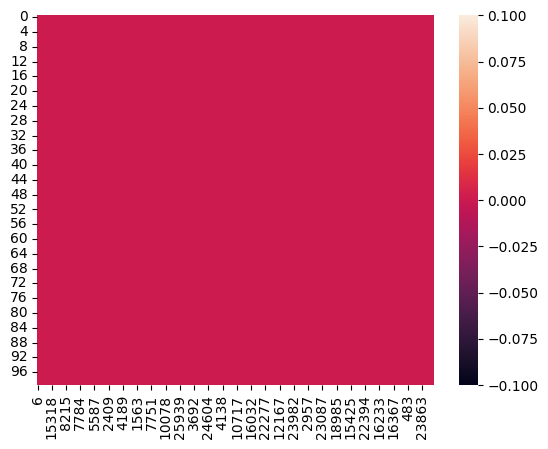

In [238]:
sns.heatmap(df.isnull())

In [239]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [240]:
# Naive_Bayes Classifier  
def naive_bayes_classifier(train_x, train_y):
    from sklearn.naive_bayes import MultinomialNB
    model = MultinomialNB(alpha=0.01)
    model.fit(train_x, train_y)
    return model
    
# Decision Tree Classifier  
def decision_tree_classifier(train_x, train_y):  
    from sklearn import tree  
    model = tree.DecisionTreeClassifier()  
    model.fit(train_x, train_y)  
    return model  
  
# KNN Classifier  
def knn_classifier(train_x, train_y):  
    from sklearn.neighbors import KNeighborsClassifier  
    model = KNeighborsClassifier()  
    model.fit(train_x, train_y)  
    return model  
  
  
# Logistic Regression Classifier  
def logistic_regression_classifier(train_x, train_y):  
    from sklearn.linear_model import LogisticRegression  
    model = LogisticRegression(penalty='l2')  
    model.fit(train_x, train_y)  
    return model  

def gradient_boosting_classifier(train_x, train_y):  
    from sklearn.ensemble import GradientBoostingClassifier  
    model = GradientBoostingClassifier()
    # model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10) 
    model.fit(train_x, train_y)  
    return model  
  
# SVM Classifier  
def svm_classifier(train_x, train_y):  
    from sklearn.svm import SVC  
    model = SVC(kernel='rbf', probability=True)  
    model.fit(train_x, train_y)  
    return model  
  
# Random Forest Classifier  
def random_forest_classifier(train_x, train_y):  
    from sklearn.ensemble import RandomForestClassifier  
    model = RandomForestClassifier(n_estimators=100)  
    model.fit(train_x, train_y)  
    return model  

In [241]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [243]:
def get_data():
    df = pd.read_csv("sample_data/cc.csv")
    df = df.fillna(0)
    print(df.info())
    
    print(df.shape)
  
    
    print(df.describe().T)


    #spliting data for input and oitput
    x=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    


    if(x.shape[0]==y.shape[0]):
        a = round (x.shape[0]*0.8)
        X_train = x.iloc[0:a] 
        X_test = x.iloc[a:] 
        y_train = y[0:a] 
        y_test = y[a:] 
        
        print(X_train.shape)
        print(X_test.shape)
        print(y_train.shape)
        print(y_test.shape) 
        print(X_train.info()) 
        print(y_train.info())   
    else:
        print("The length of X and y are not the same!")
    
  
    return X_train,X_test,y_train,y_test

In [244]:
x_train,x_test,y_train,y_test = get_data()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 4429 entries, 6 to 24861
dtypes: float64(4376), int64(53)
memory usage: 3.4 MB
None
(100, 4429)
       count   mean        std  min   25%   50%    75%   max
6      100.0   0.05   0.411329  0.0   0.0   0.0   0.00   4.0
160    100.0  50.15  28.764237  2.0  27.0  49.5  72.25  97.0
438    100.0   0.07   0.256432  0.0   0.0   0.0   0.00   1.0
479    100.0   0.15   0.557320  0.0   0.0   0.0   0.00   4.0
618    100.0   0.05   0.219043  0.0   0.0   0.0   0.00   1.0
...      ...    ...        ...  ...   ...   ...    ...   ...
11898  100.0   0.01   0.100000  0.0   0.0   0.0   0.00   1.0
16484  100.0   0.01   0.100000  0.0   0.0   0.0   0.00   1.0
20751  100.0   0.01   0.100000  0.0   0.0   0.0   0.00   1.0
21531  100.0   0.01   0.100000  0.0   0.0   0.0   0.00   1.0
24861  100.0   0.02   0.200000  0.0   0.0   0.0   0.00   2.0

[4429 rows x 8 columns]
(80, 4428)
(20, 4428)
(80,)
(20,)
<class 'pandas.core.frame.DataFra

In [245]:
y_train[:100]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
75    0.0
76    0.0
77    0.0
78    0.0
79    0.0
Name: 24861, Length: 80, dtype: float64

In [246]:
df.iloc[:100]

,6,160,438,479,618,958,1195,1228,1516,1551,...,2696,3354,9291,9639,11514,11898,16484,20751,21531,24861
0,1.0,31,1.0,1.0,1.0,1.0,52,0.89,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,19,0.0,0.0,1.0,1.0,55,0.73,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,40,0.0,0.0,0.0,0.0,69,0.38,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,30,0.0,0.0,0.0,0.0,86,0.84,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,95,0.0,0.0,0.0,1.0,5,0.43,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,34,0.0,0.0,0.0,0.0,91,0.83,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,12,0.0,0.0,0.0,0.0,65,0.48,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,95,0.0,0.0,0.0,0.0,89,0.27,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,89,0.0,0.0,0.0,0.0,51,0.29,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
x_train[:100]

,6,160,438,479,618,958,1195,1228,1516,1551,...,2203,2696,3354,9291,9639,11514,11898,16484,20751,21531
0,1.0,31,1.0,1.0,1.0,1.0,52,0.89,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,19,0.0,0.0,1.0,1.0,55,0.73,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,40,0.0,0.0,0.0,0.0,69,0.38,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,30,0.0,0.0,0.0,0.0,86,0.84,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,95,0.0,0.0,0.0,1.0,5,0.43,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,69,0.0,0.0,0.0,0.0,53,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,63,0.0,0.0,1.0,0.0,64,0.73,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,4.0,72,0.0,1.0,0.0,0.0,93,0.72,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,76,0.0,0.0,0.0,0.0,2,0.83,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [248]:
    test_classifiers = [
        'NB',
         'KNN', 
         #'LR', 
        'RF', 
        'DT', 
        #'SVM',
        #'GBDT'
        ]  
        
        
    classifiers = {
    
                'NB':naive_bayes_classifier,   
                  'KNN':knn_classifier,  
                   #'LR':logistic_regression_classifier,  
                   'RF':random_forest_classifier,  
                   'DT':decision_tree_classifier,  
                  #'SVM':svm_classifier,  

                 #'GBDT':gradient_boosting_classifier  
    }  



In [249]:
print(x_train[:100])

      6  160  438  479  618  958  1195  1228  1516  1551  ...  2203  2696  \
0   1.0   31  1.0  1.0  1.0  1.0    52  0.89   1.0   1.0  ...   0.0   0.0   
1   0.0   19  0.0  0.0  1.0  1.0    55  0.73   0.0   0.0  ...   0.0   0.0   
2   0.0   40  0.0  0.0  0.0  0.0    69  0.38   0.0   0.0  ...   0.0   0.0   
3   0.0   30  0.0  0.0  0.0  0.0    86  0.84   0.0   0.0  ...   0.0   0.0   
4   0.0   95  0.0  0.0  0.0  1.0     5  0.43   0.0   0.0  ...   0.0   0.0   
..  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...   ...   ...   
75  0.0   69  0.0  0.0  0.0  0.0    53  0.05   0.0   0.0  ...   0.0   0.0   
76  0.0   63  0.0  0.0  1.0  0.0    64  0.73   0.0   0.0  ...   0.0   0.0   
77  4.0   72  0.0  1.0  0.0  0.0    93  0.72   0.0   0.0  ...   0.0   0.0   
78  0.0   76  0.0  0.0  0.0  0.0     2  0.83   0.0   0.0  ...   0.0   0.0   
79  0.0    6  0.0  0.0  0.0  0.0    63  0.03   0.0   0.0  ...   0.0   0.0   

    3354  9291  9639  11514  11898  16484  20751  21531  
0    0.0   0.0   

In [250]:
for classifier in test_classifiers: 
    print('******************* %s ********************' % classifier) 
  
    model = classifiers[classifier](x_train, y_train) 
  
    predict = model.predict(x_test) 
    train_out = model.predict(x_train) 
  
    matrix = confusion_matrix(y_test, predict) 
    print(matrix) 
    class_report = classification_report(y_test, predict) 
    print(class_report)

******************* NB ********************
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         2.0       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20

******************* KNN ********************
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         2.0       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20

******************* RF ********************
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         2.0       0.00      0.00      0.00    